<a href="https://colab.research.google.com/github/jason803/gnbai20201/blob/master/gnbai_4%EC%A3%BC%EC%B0%A8_%EB%B0%B1%EB%B3%B4%EC%84%B12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Imports


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
columns = ['x1', 'x2', 'y']
data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/data_lab3.txt", names = columns, sep = ' ')

In [6]:
data

,x1,x2,y
0,1.964300,4.5957,1
1,2.275300,3.8589,1
2,2.978100,4.5651,1
3,2.932000,3.5519,1
4,3.577200,2.8560,1
5,4.015000,3.1937,1
6,3.381400,3.4291,1
7,3.911300,4.1761,1
8,2.782200,4.0431,1
9,2.551800,4.6162,1


### 3. define x

In [0]:
data_np = np.asarray(data)

# shuffle data
np.random.shuffle(data_np)

# define x
x = data_np[:, :2] #: ->전부다 :2 -> 2번째칸 전부

# define y
labels = data_np[:, 2].astype(np.int)
y = np.identity(2)[labels]

In [8]:
labels

array([0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0])

In [0]:
#define I, N, J, K

I, N = x.shape #unpacking
J = y.shape[1] #yshape의 두번째 값
K = 5

In [0]:
# x_bar -> 안바뀌므로 미리 해둠.
x_bar = np.hstack((np.ones((I, 1)), x))

#initialize parameters
v = np.random.rand(N+1, K)#rand함수 주어진 크기의 행렬 형성
w = np.random.rand(K+1, J)

In [11]:
w

array([[0.1553578 , 0.51917492],
       [0.21099921, 0.8988923 ],
       [0.72387908, 0.88824525],
       [0.92599345, 0.08068309],
       [0.08913028, 0.13424248],
       [0.59650214, 0.7757786 ]])

### 4. Train

In [0]:
#define hyperparameters

alpha1 = 0.01
alpha2 = 0.01

max_epoch = 3000

In [0]:
def sigmoid(z):
  return 1./(np.ones_like(z)+np.exp(-z))

In [0]:
def SSE(g, y): #g예측값 y정답
  result = 0
  for i in range(g.shape[0]):
    for j in range(g.shape[1]):
      result += (g[i, j] - y[i, j])**2

  return result/2

In [15]:
for epoch in range(max_epoch):
  # forward propagation 순전파

  x_bar_bar = np.dot(x_bar, v) #내적
  F = sigmoid(x_bar_bar)
  F_bar = np.hstack((np.ones((I, 1)), F))
  F_bar_bar = np.dot(F_bar, w)
  G = sigmoid(F_bar_bar)

  # backward propagation 역전파

  # 출력층 단계
  for k in range(0, K+1):
    for j in range(0, J):
      for i in range(0, I):
        w[k, j] -= alpha1*(G[i, j] - y[i, j])*G[i, j]*(1-G[i, j])*F_bar[i, k]

  # 은닉층 단계
  for n in range(0, N+1):
    for k in range(0, K): #1부터 K, I, J인데 그냥 0부터함
      for i in range(0, I):
        for j in range(0, J):
          v[n, k] -= alpha2*(G[i, j]-y[i, j])*G[i, j]*(1-G[i, j])*w[k, j]*F[i, k]*(1-F[i, k])*x_bar[i, n]
  
  error = SSE(G, y)
  
  if epoch % 100 == 0:
    print("epoch: %d, error: %.2f" %(epoch, error))

epoch: 0, error: 22.95
epoch: 100, error: 12.48
epoch: 200, error: 12.45
epoch: 300, error: 12.36
epoch: 400, error: 12.25
epoch: 500, error: 12.11
epoch: 600, error: 11.94
epoch: 700, error: 11.74
epoch: 800, error: 11.53
epoch: 900, error: 11.19
epoch: 1000, error: 10.73
epoch: 1100, error: 10.09
epoch: 1200, error: 9.66
epoch: 1300, error: 8.17
epoch: 1400, error: 6.77
epoch: 1500, error: 5.67
epoch: 1600, error: 6.05
epoch: 1700, error: 5.46
epoch: 1800, error: 4.52
epoch: 1900, error: 3.80
epoch: 2000, error: 3.28
epoch: 2100, error: 2.89
epoch: 2200, error: 2.59
epoch: 2300, error: 2.36
epoch: 2400, error: 2.18
epoch: 2500, error: 2.03
epoch: 2600, error: 1.91
epoch: 2700, error: 1.81
epoch: 2800, error: 1.72
epoch: 2900, error: 1.65


In [16]:
w

array([[ 2.35216863, -2.81010132],
       [ 2.00587463, -2.01217981],
       [ 3.30166716, -3.0420842 ],
       [-2.53289746,  2.74109573],
       [-6.23278276,  6.08412444],
       [ 0.27877342,  0.12557274]])

###5. Test

In [0]:
def h(x, v, w):
  _x_bar = np.hstack((np.ones((I, 1)), x))
  _x_bar_bar = np.dot(_x_bar, v) #내적
  _F = sigmoid(_x_bar_bar)
  _F_bar = np.hstack((np.ones((I, 1)), _F))
  _F_bar_bar = np.dot(_F_bar, w)
  _G = sigmoid(_F_bar_bar)

  return _G

In [0]:
g = h(x, v, w)

In [0]:
labels = np.argmax(g, axis = 1)

### 6. Plot

In [0]:
# 0: 파란색 1: 빨간색

x_0 = x[labels == 0]
x_1 = x[labels == 1]

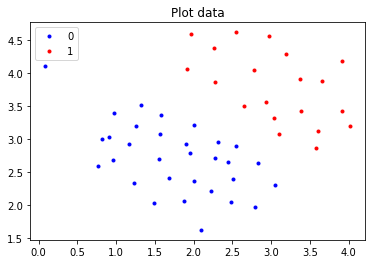

In [21]:
plt.plot(x_0[:, 0], x_0[:, 1], 'b.', label='0')
plt.plot(x_1[:, 0], x_1[:, 1], 'r.', label='1')
plt.title('Plot data') #제목
plt.legend() #범례
plt.show()

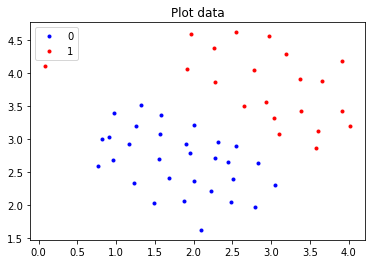

In [22]:
labels_ori = np.argmax(y, axis=1)
x_0_ori = x[labels_ori == 0]
x_1_ori = x[labels_ori == 1]

plt.plot(x_0_ori[:, 0], x_0_ori[:, 1], 'b.', label='0')
plt.plot(x_1_ori[:, 0], x_1_ori[:, 1], 'r.', label='1')
plt.title('Plot data') #제목
plt.legend() #범례
plt.show()

##iris data읽기

In [0]:
columns = ['x1', 'x2','x3', 'y']
data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/iris.csv", names = columns, sep = ',')

In [27]:
data

,x1,x2,x3,y
5.1,3.5,1.4,0.2,Iris-setosa
4.9,3.0,1.4,0.2,Iris-setosa
4.7,3.2,1.3,0.2,Iris-setosa
4.6,3.1,1.5,0.2,Iris-setosa
5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...
6.7,3.0,5.2,2.3,Iris-virginica
6.3,2.5,5.0,1.9,Iris-virginica
6.5,3.0,5.2,2.0,Iris-virginica
6.2,3.4,5.4,2.3,Iris-virginica
